In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df1 = pd.read_csv('./data/Admission_Predict.csv')
df2 = pd.read_csv('./data/Admission_Predict_Ver1.1.csv')
# Combining the tow data files
full_df = df1.append(df2, ignore_index=True)

# Changing columns names
full_df.columns = ['serial_no', 'gre_score', 'toefl_score', 'uni_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']

# Drop unwanted column
full_df = full_df.drop(['serial_no'], axis=1)

full_df.head(5)

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
full_df.describe()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,chance_of_admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [5]:
full_df.info()

# Get values from research column 
full_df['research'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gre_score        900 non-null    int64  
 1   toefl_score      900 non-null    int64  
 2   uni_rating       900 non-null    int64  
 3   sop              900 non-null    float64
 4   lor              900 non-null    float64
 5   cgpa             900 non-null    float64
 6   research         900 non-null    int64  
 7   chance_of_admit  900 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 56.4 KB


1    499
0    401
Name: research, dtype: int64

In [6]:
# Drop 98 of the rows where research=1 to get same portions
drop_indices = np.random.choice(full_df[full_df['research']==1].index, 98, replace=False)
full_df.drop(drop_indices, inplace=True)
full_df.reset_index(drop=True)

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,322,110,3,3.5,2.5,8.67,1,0.80
2,314,103,2,2.0,3.0,8.21,0,0.65
3,330,115,5,4.5,3.0,9.34,1,0.90
4,308,101,2,3.0,4.0,7.90,0,0.68
...,...,...,...,...,...,...,...,...
797,332,108,5,4.5,4.0,9.02,1,0.87
798,337,117,5,5.0,5.0,9.87,1,0.96
799,330,120,5,4.5,5.0,9.56,1,0.93
800,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
print(full_df['research'].value_counts())

1    401
0    401
Name: research, dtype: int64


In [8]:
# Rescale all data values into values between 0-1
for col in full_df.columns:
    full_df['new_'+col] = (full_df[col]-full_df[col].min())/(full_df[col].max()-full_df[col].min())

In [9]:
# Drop old columns
full_df = full_df.drop(full_df.columns.to_series()['gre_score':'chance_of_admit'], axis=1)

full_df.head(5)

,new_gre_score,new_toefl_score,new_uni_rating,new_sop,new_lor,new_cgpa,new_research,new_chance_of_admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
5,0.80,0.821429,1.00,0.875,0.500,0.814103,1.0,0.888889
7,0.36,0.321429,0.25,0.500,0.750,0.352564,0.0,0.539683


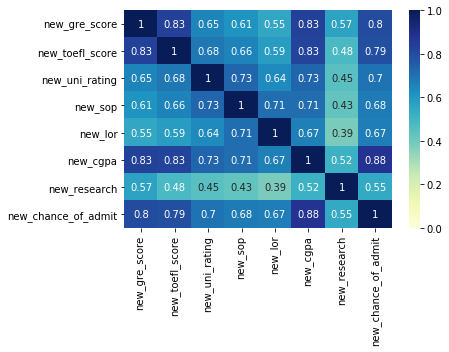

In [10]:
# Plot the correlation matrix
ax = sns.heatmap(full_df.corr(), annot=True,vmin=0, vmax=1 ,cmap='YlGnBu')

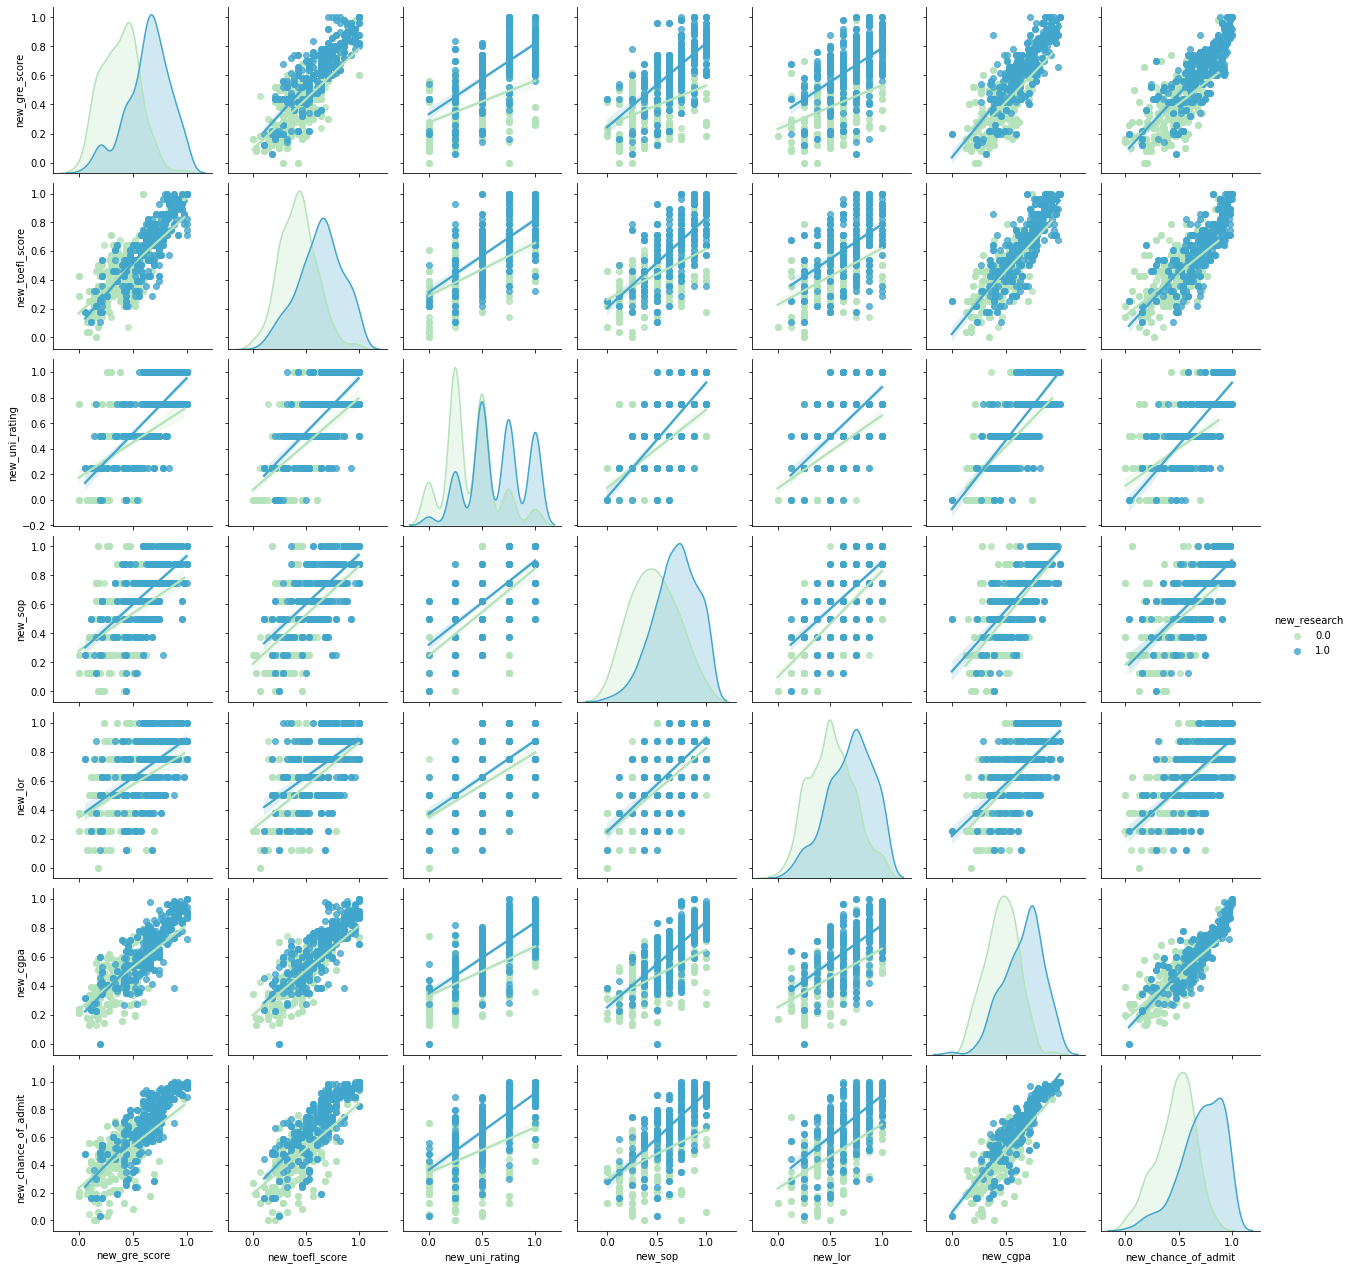

In [11]:
pair = sns.pairplot(full_df, hue="new_research", kind='reg', palette='GnBu')

In [12]:
# Create dummies for research column
full_df = pd.concat([full_df,pd.get_dummies(full_df['new_research'], prefix='research')],axis=1)
full_df = full_df.drop('new_research',axis = 1)

In [13]:
full_df.columns

Index(['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop',
       'new_lor', 'new_cgpa', 'new_chance_of_admit', 'research_0.0',
       'research_1.0'],
      dtype='object')

In [17]:
# Calculate the veriance inflation factor for multicollinearity
inputs = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop', 'new_lor', 'new_cgpa',
                  'research_0.0', 'research_1.0']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(inputs.values, i) for i in (range(inputs.shape[1]))]
vif["features"] = inputs.columns

In [18]:
vif.head(full_df.shape[1])

,VIF Factor,features
0,4.534013,new_gre_score
1,4.236183,new_toefl_score
2,2.769405,new_uni_rating
3,2.909019,new_sop
4,2.299083,new_lor
5,5.106086,new_cgpa
6,5.713369,research_0.0
7,10.080013,research_1.0


In [19]:
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop', 'new_lor', 'new_cgpa', 'research_0.0',
             'research_1.0']]
Y = full_df['new_chance_of_admit']

model = OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_chance_of_admit   R-squared:                       0.806
Model:                             OLS   Adj. R-squared:                  0.804
Method:                  Least Squares   F-statistic:                     471.7
Date:                 Wed, 08 Jul 2020   Prob (F-statistic):          7.22e-278
Time:                         15:44:24   Log-Likelihood:                 707.14
No. Observations:                  802   AIC:                            -1398.
Df Residuals:                      794   BIC:                            -1361.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
new_gre_score       0.1354      0.033      4.065      0.000       0.070       0.201
new_toefl_score     0.1282      0.034      3.793      0.000       0.062       0.194
new_uni_rating      0.0266      0.021      1.278      0.202      -0.014       0.067
new_sop            -0.0033      0.024     -0.138      0.890      -0.051       0.044
new_lor             0.1291      0.023      5.522      0.000       0.083       0.175
new_cgpa            0.6003      0.041     14.474      0.000       0.519       0.682
research_0.0        0.0086      0.012      0.714      0.476      -0.015       0.032
research_1.0        0.0461      0.016      2.885      0.004       0.015       0.077
==============================================================================
Omnibus:                      168.156   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.496
Skew:                          -1.153   Prob(JB):                     3.18e-79
Kurtosis:                       5.344   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_lor', 'new_cgpa', 'research_1.0']]
Y = full_df['new_chance_of_admit']

model = OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     new_chance_of_admit   R-squared (uncentered):                   0.975
Model:                             OLS   Adj. R-squared (uncentered):              0.975
Method:                  Least Squares   F-statistic:                              5219.
Date:                 Wed, 08 Jul 2020   Prob (F-statistic):                        0.00
Time:                         15:44:35   Log-Likelihood:                          706.88
No. Observations:                  802   AIC:                                     -1402.
Df Residuals:                      796   BIC:                                     -1374.
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
new_gre_score       0.1347      0.033      4.052      0.000       0.069       0.200
new_toefl_score     0.1297      0.033      3.872      0.000       0.064       0.195
new_uni_rating      0.0226      0.019      1.177      0.240      -0.015       0.060
new_lor             0.1331      0.021      6.489      0.000       0.093       0.173
new_cgpa            0.6103      0.038     16.033      0.000       0.536       0.685
research_1.0        0.0365      0.009      4.226      0.000       0.020       0.053
==============================================================================
Omnibus:                      163.453   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.380
Skew:                          -1.125   Prob(JB):                     1.36e-76
Kurtosis:                       5.322   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# I removed `new_sop` and 'research_0.0' columns beacause of the high P value
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_lor', 'new_cgpa', 'research_1.0']]
Y = full_df['new_chance_of_admit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)

print("Root Mean Squared Error : ", rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.10185196507296018
R-Squared Error: 0.8043989389197743
